In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, preprocessing, metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.datasets import load_digits

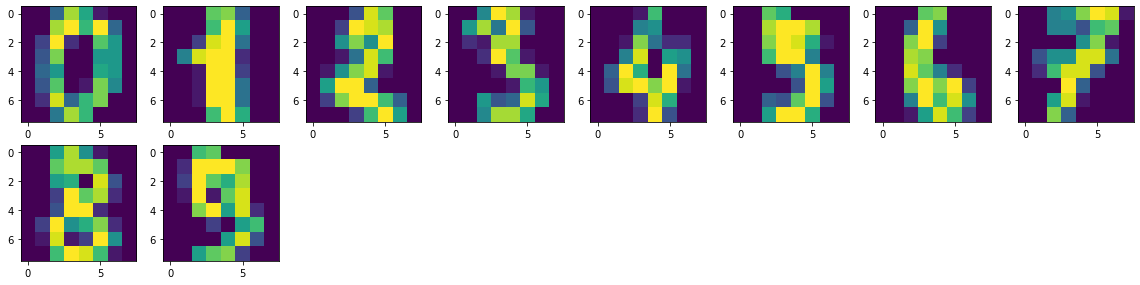

In [26]:
# Load digit dataset
data = load_digits()

plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(8, 8, i+1)
    plt.imshow(data.images[i])

**Split train-test: 80%-20%**

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.20, random_state=78)

# Gaussina models
mdl = GaussianNB()

# train model
mdl.fit(X_train, Y_train)

# training completed
Y_predict = mdl.predict(X_test)

print(f"Accuracy:- \n{metrics.accuracy_score(Y_test, Y_predict)}")

Accuracy:- 
0.8611111111111112


In [28]:
data.images[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

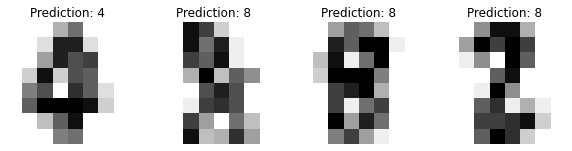

In [29]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, Y_predict):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [30]:
print(f"Classification report:- \n{metrics.classification_report(Y_test, Y_predict)}\n")

Classification report:- 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.86      0.75      0.80        32
           2       0.92      0.85      0.88        26
           3       0.88      0.72      0.79        39
           4       0.95      0.88      0.91        48
           5       0.90      0.84      0.87        31
           6       1.00      1.00      1.00        42
           7       0.82      1.00      0.90        46
           8       0.57      0.91      0.70        33
           9       0.93      0.69      0.79        39

    accuracy                           0.86       360
   macro avg       0.88      0.86      0.86       360
weighted avg       0.88      0.86      0.86       360




Confusion matrix:
[[23  0  0  0  0  1  0  0  0  0]
 [ 0 24  0  0  0  0  0  1  5  2]
 [ 0  0 22  0  1  0  0  0  3  0]
 [ 0  1  1 28  0  1  0  1  7  0]
 [ 0  1  0  0 42  1  0  3  1  0]
 [ 0  0  0  1  0 26  0  2  2  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 46  0  0]
 [ 0  0  1  0  0  0  0  2 30  0]
 [ 0  2  0  3  1  0  0  1  5 27]]



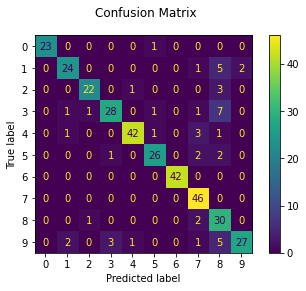

In [34]:
fig = metrics.plot_confusion_matrix(mdl, X_test, Y_test)
print(f"Confusion matrix:\n{fig.confusion_matrix}\n")

fig.figure_.suptitle("Confusion Matrix")
plt.show()